Following tutorial from https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Feature Selection with Univariate Statistical Tests

In [1]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
filename = 'pima-indians-diabetes.txt'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

Data set downloaded from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

In [2]:
df = read_csv(filename, names=names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
array = df.values
X = array[:, 0:8]
Y = array[:, 8]

## Univariate Selection

- Statistical tests can be used to select those features that have the strongest relationship with the output variable.

- The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

- Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.

In [9]:
# feature extraction using best Anova F-values
test = SelectKBest(score_func=f_classif, k=4) # Select features according to the k highest scores.
fit = test.fit(X,Y)   # ANOVE F-value between label-feature for classification tasks

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


Highest scores are for features with indexes 0 (preg), 1 (plas), 5 (mass), and 7 (age)

### EDA Viz

### Modeling

## Recursive Feature Elimination

- The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

- It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction using logistic regr.
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)              # recursive feature elimination object
fit = rfe.fit(X, Y)              # fitting recursive feature elimination model

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


C:\Users\Norbert\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The selected features include: 'preg', 'mass', and 'pedi'

## Principal Component Analysis (PCA)

- PCA uses linear algebra to transform the dataset into a compressed form.

- Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

- In the example below, we use PCA and select 3 principal components.

In [14]:
from sklearn.decomposition import PCA

# feature extraction using PCA
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## Feature Importance
 - Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

 - In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. 

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.107 0.234 0.102 0.082 0.076 0.137 0.12  0.141]


The 3 most important features are plas, mass, and age

# Plotting Decision Regions for Classifiers

TypeError: axis() got an unexpected keyword argument 'y_min'

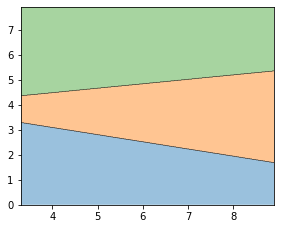

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()